In [1]:
import pandas as pd

In [2]:
eth = pd.read_csv("tweetdata/ETH_tweets.csv")
des = eth.describe()

In [3]:
eth.iloc[0, ]

Unnamed: 0                                                         0
id                                               1345482340953436168
conversation_id                                  1345479496422588416
created_at                                           1609622962000.0
date                                                      2021-01-02
timezone                                                         200
place                                                            NaN
tweet              @JimFTFD I got lucky a few years ago and made ...
language                                                          en
hashtags                                                          []
cashtags                                              ['BTC', 'ETH']
user_id                                                     22451390
user_id_str                                                 22451390
username                                                AlexShelnutt
name                              

### Number of replies distribution

<AxesSubplot:>

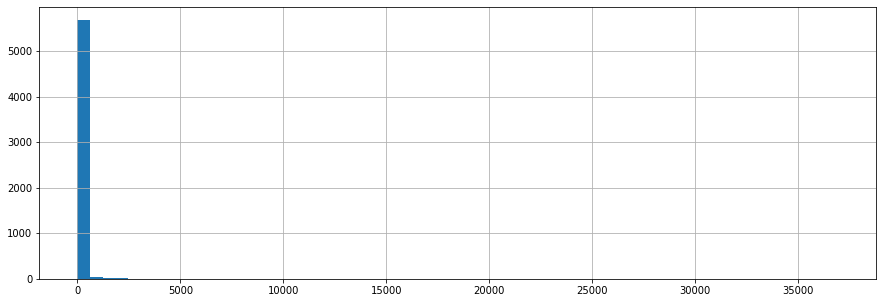

In [4]:
eth.nreplies.hist(figsize = (15, 5), bins = 60)

In [5]:
des["nreplies"]

count     5765.000000
mean        57.246141
std        543.316346
min          0.000000
25%          1.000000
50%          4.000000
75%         25.000000
max      36959.000000
Name: nreplies, dtype: float64

### Number of likes

<AxesSubplot:>

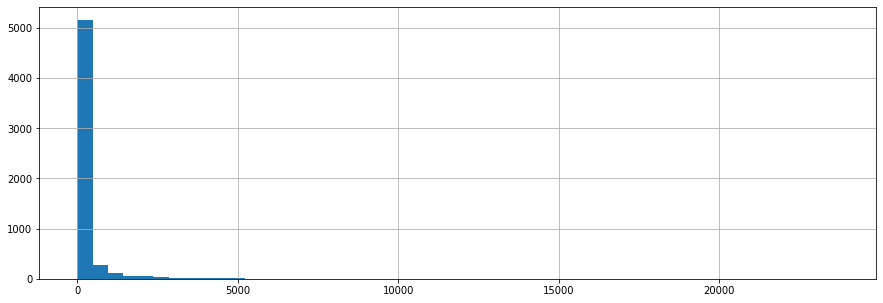

In [6]:
eth.nlikes.hist(figsize = (15, 5), bins = 50)

In [7]:
des["nlikes"]

count     5765.000000
mean       247.998612
std        850.776703
min          0.000000
25%          5.000000
50%         29.000000
75%        170.000000
max      23702.000000
Name: nlikes, dtype: float64

### Number of retweets

<AxesSubplot:>

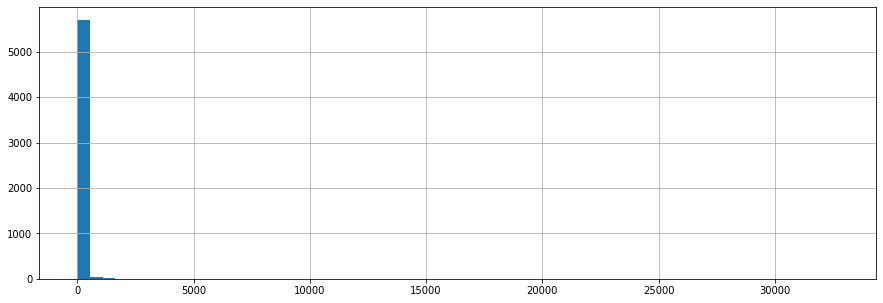

In [8]:
eth.nretweets.hist(figsize = (15, 5), bins = 60)

In [9]:
des["nretweets"]

count     5765.000000
mean        42.881353
std        462.929031
min          0.000000
25%          0.000000
50%          4.000000
75%         23.000000
max      32733.000000
Name: nretweets, dtype: float64

### Has-Video percentage

In [10]:
des["video"]["mean"] * 100

29.037294015611447

### Total count by timeframe

In [11]:
tdf = pd.DataFrame.from_dict(
{
    "time": pd.to_datetime(eth.created_at.astype(int)/1000,unit='s'),
}
)
tdf["b"] = 1

### 5min

<AxesSubplot:xlabel='time'>

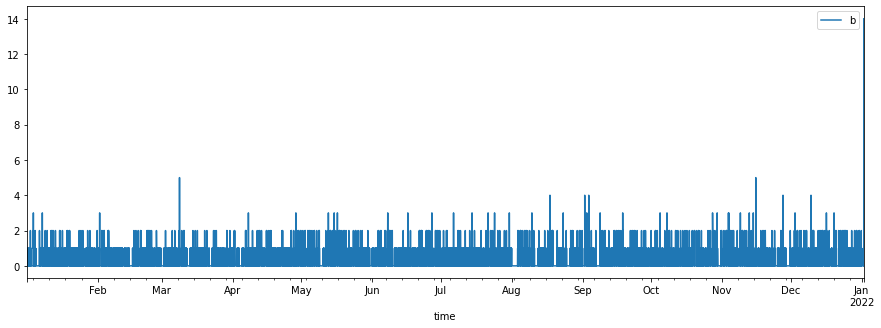

In [12]:
tzmin = tdf.set_index('time').resample('5min').sum()
tzmin.plot(figsize = (15, 5))

### 30min

<AxesSubplot:xlabel='time'>

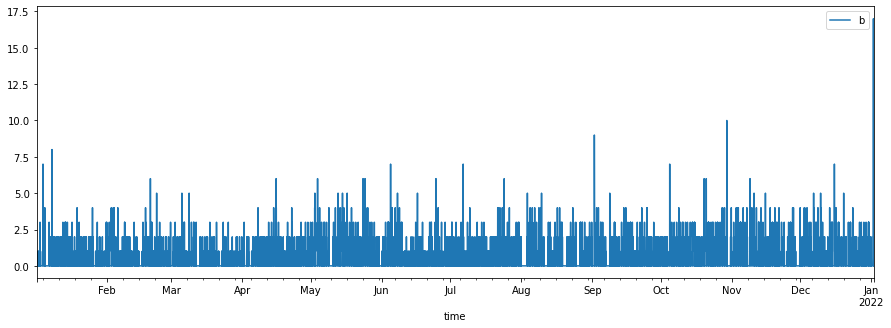

In [13]:
tzmin = tdf.set_index('time').resample('30min').sum()
tzmin.plot(figsize = (15, 5))

### 1h

<AxesSubplot:xlabel='time'>

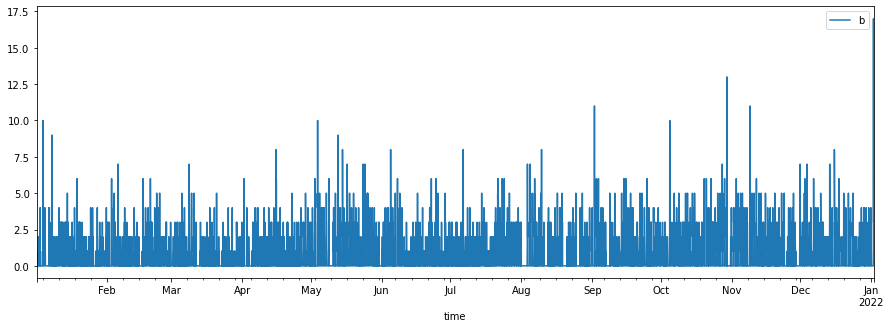

In [14]:
szmin = tdf.set_index('time').resample('60min').sum()
szmin.plot(figsize = (15, 5))

### 4h

<AxesSubplot:xlabel='time'>

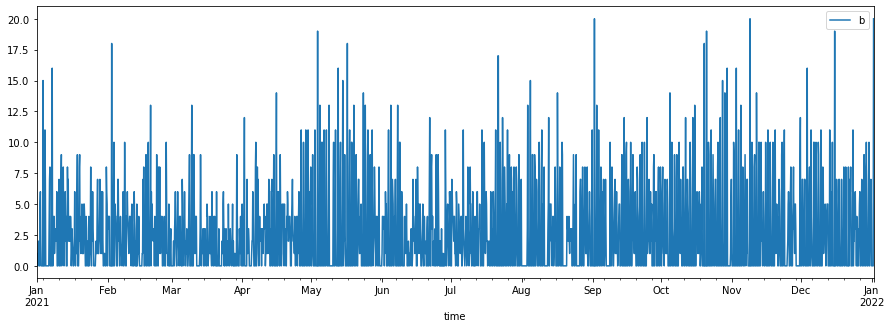

In [15]:
fh = tdf.set_index('time').resample('4h').sum()
fh.plot(figsize = (15, 5))

### 1 day

<AxesSubplot:xlabel='time'>

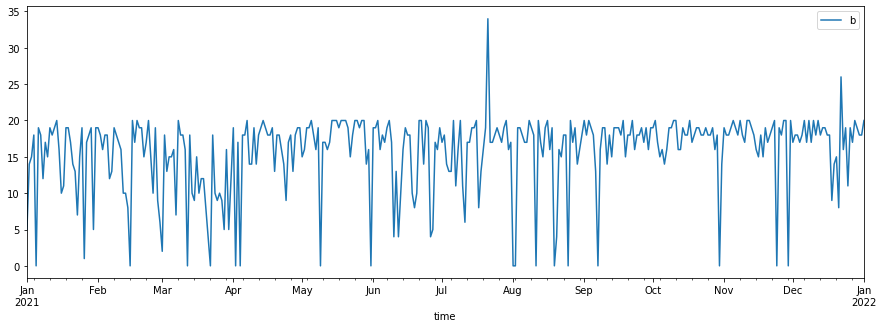

In [16]:
od = tdf.set_index('time').resample('1d').sum()
od.plot(figsize = (15, 5))

## Text data

In [ ]:
# import urllib.request
# import json
# import re 
# import emoji 
# from tqdm import tqdm
# import numpy as np
# from transformers import AutoTokenizer, AutoModelForSequenceClassification,pipeline
# from transformers import RobertaForSequenceClassification, RobertaTokenizer
# MODELPATH = f"zhayunduo/roberta-base-stocktwits-finetuned"
# tokenizer = RobertaTokenizer.from_pretrained(MODELPATH)
# model = RobertaForSequenceClassification.from_pretrained(MODELPATH , output_hidden_states = False)
# pipe = pipeline("text-classification", model=model, tokenizer=tokenizer)

# def clean_tweet(tweet):
#     if type(tweet) == float:
#         return ""
#     temp = tweet.lower()
#     temp = re.sub("'", "", temp) # to avoid removing contractions in english
#     temp = re.sub("@[A-Za-z0-9_]+","", temp)
#     temp = re.sub("#[A-Za-z0-9_]+","", temp)
#     temp = re.sub(r'http\S+', '', temp)
#     temp = re.sub('[()!?]', ' ', temp)
#     temp = re.sub('\[.*?\]',' ', temp)
#     temp = re.sub("[^a-z0-9]"," ", temp)
#     temp = temp.split()
#     stopwords = ["for", "on", "an", "a", "of", "and", "in", "the", "to", "from"]
#     temp = [w for w in temp if not w in stopwords]
#     temp = " ".join(word for word in temp)
#     return temp

# def get_label(text):
#     res = pipe(text)[0]
#     score = res['score']
#     label = res['label']
#     intlabel = 0
#     if label == "LABEL_1":
#         intlabel = 1
#     return intlabel, score

# t = eth[["tweet", "username"]]

# clean_tweets = []
# for tw in tqdm(t.tweet):
#     clean_tweets.append(clean_tweet(tw))
    
# t["clean"] = clean_tweets
# labels = []
# scores = []

# for cl in tqdm(t.clean):
#     label, score = get_label(cl)
#     labels.append(label)
#     scores.append(score)
    
# t["label"] = labels
# t["scores"] = scores
# t.to_csv("parsed_tweets.csv", index = False)

In [17]:
t = pd.read_csv("parsed_tweets.csv")

<AxesSubplot:>

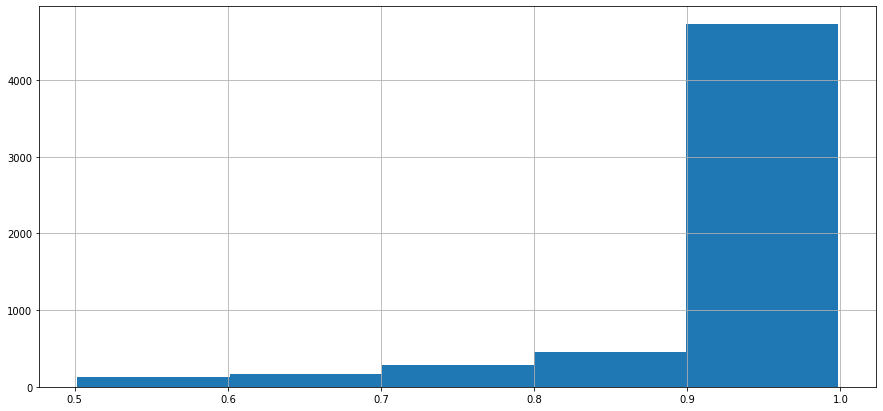

In [18]:
t.scores.hist(figsize = (15, 7), bins = 5)

#### Filter by significance score > 0.9

<AxesSubplot:>

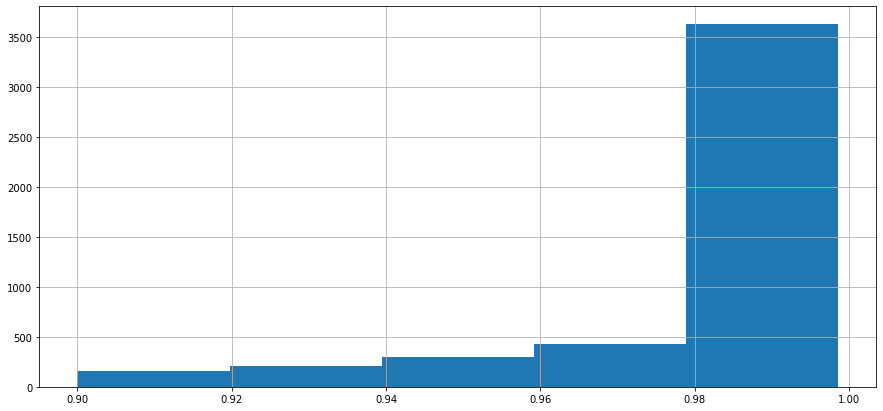

In [19]:
t = t[t.scores >= 0.9]
t.scores.hist(figsize = (15, 7), bins = 5)

### User data 

In [ ]:
# baseurl = "https://cdn.syndication.twimg.com/widgets/followbutton/info.json?screen_names="
# def get_follower_count(username):
#         url = baseurl + username
#         return json.loads(urllib.request.urlopen(url).read())[0]["followers_count"]
    
# usernames = t.username.unique().tolist()
# followers = []
# for u in tqdm(usernames):#[usernames.index('UTRUST'):]:
#     fc = get_follower_count(u)
#     print(u, fc)
#     followers.append(fc)
# users = pd.DataFrame.from_dict({
#     "username" : usernames,
#     "followers": followers,
# })
# users.to_csv("follower_counts.csv", index = False)
# users

In [20]:
users = pd.read_csv("follower_counts.csv")

### Joining tweets and follower counts

In [21]:
d = pd.merge(users, t, on='username', how='inner')
d.label = d.label.replace(0, -1)
d["time"] = tdf.time

In [22]:
d.to_csv("fulljoin.csv", index = False)

In [23]:
d["score"] = d.label * d.followers

In [24]:
d

,username,followers,tweet,clean,label,scores,time,score
0,davidgokhshtein,704809,$ETH @ $785 🔥 More excited about this right n...,eth 785 more excited about this right now,1,0.909334,2021-01-02 21:29:22,704809
1,davidgokhshtein,704809,Looks like $LTC and $ETH are starting to follo...,looks like ltc eth are starting follow,1,0.988032,2021-01-02 20:41:13,704809
2,davidgokhshtein,704809,I think some institutions will start buying $E...,i think some institutions will start buying et...,1,0.998615,2021-01-02 19:37:52,704809
3,davidgokhshtein,704809,I’d like to see $ETH make a strong move here. ...,i d like see eth make strong move here current...,1,0.998511,2021-01-02 18:20:25,704809
4,davidgokhshtein,704809,@cameron @kieranmlkelly Boom! I’m collecting...,boom i m collecting eth,1,0.974819,2021-01-02 16:54:23,704809
...,...,...,...,...,...,...,...,...
4717,Blockanalia,26062,$GAS - $ETH Uniswap pool deployer in the 7th Y...,gas eth uniswap pool deployer 7th yfi farmer n...,1,0.998338,2021-11-02 22:00:00,26062
4718,ezraklein,2663153,@Sjr05d @PranMan @VitalikButerin Once a blogge...,once blogger always blogger,1,0.998540,2021-11-02 20:54:18,2663153
4719,ezraklein,2663153,I enjoyed this @VitalikButerin post on the Bul...,i enjoyed this post bulldozer vs vetocracy axi...,1,0.996695,2021-11-02 20:38:32,2663153
4720,KRLS,797915,"In 2015, @VitalikButerin and other developers ...",2015 other developers launched ethereum first ...,1,0.984219,2021-11-02 20:37:35,797915


<AxesSubplot:xlabel='time'>

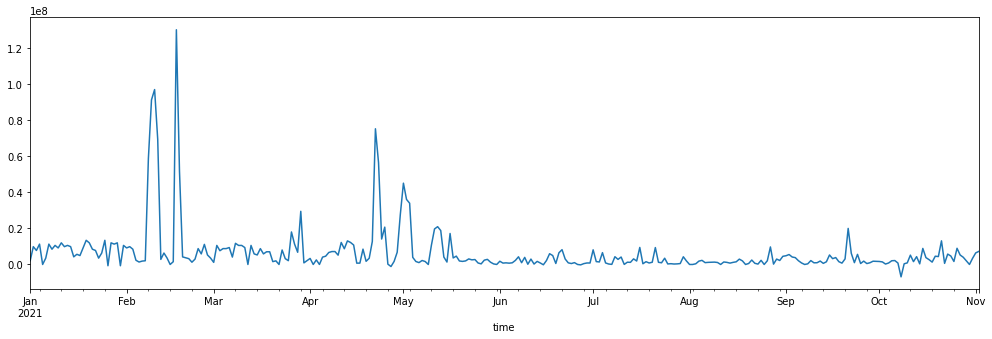

In [25]:
d.set_index('time').resample('1d').sum()["score"].plot(figsize = (17, 5))

### Prices

In [26]:
from datetime import timezone

In [27]:
ethpath = "Binance_ETHUSDT_2021_minute.csv"
eth = pd.read_csv(ethpath, skiprows = 1, parse_dates=["date"])[['date',  'open', 'close', 'Volume USDT']][::-1]
eth["price"] = (eth.open + eth.close)/2
eth["time"] = eth.date
eth = eth[["time", "price", 'Volume USDT']]
eth['time'] = eth['time'].dt.tz_localize(timezone.utc)

In [28]:
eth

,time,price,Volume USDT
520541,2021-01-01 00:01:00+00:00,737.930,828662.134054
520540,2021-01-01 00:02:00+00:00,738.300,308922.657830
520539,2021-01-01 00:03:00+00:00,737.585,225752.744573
520538,2021-01-01 00:04:00+00:00,737.135,258306.222210
520537,2021-01-01 00:05:00+00:00,736.375,481658.098823
...,...,...,...
4,2021-12-31 23:55:00+00:00,3678.005,317575.910947
3,2021-12-31 23:56:00+00:00,3676.865,237389.917077
2,2021-12-31 23:57:00+00:00,3677.270,352361.427377
1,2021-12-31 23:58:00+00:00,3676.330,476610.500632


### Joining tweet and prices data

In [39]:
import numpy as np
GLOBAL_TWEETS = d.copy()
GLOBAL_PRICES = eth.copy()
def merged_dataset(timeframe):
    temp = pd .DataFrame(d.set_index('time').resample(timeframe).sum()["score"]).reset_index(drop=False)
    temp['time'] = temp['time'].dt.tz_localize(timezone.utc)
    df =  pd.merge(eth, 
         temp,
         on = "time").set_index('time')
    df.to_csv(timeframe + ".csv", index = False)
    return df

## 1min

In [40]:
onemin = merged_dataset("1min")
onemin.corr()

,price,Volume USDT,score
price,1.000000,0.084885,-0.010798
Volume USDT,0.084885,1.000000,0.006501
score,-0.010798,0.006501,1.000000


<AxesSubplot:xlabel='time'>

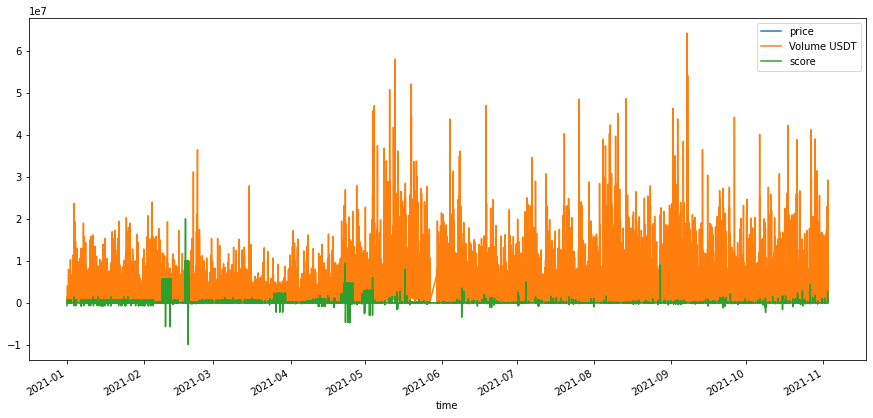

In [41]:
onemin.plot(figsize = (15, 7))

In [42]:
import matplotlib.pyplot as plt

def plot_joined_df(df):
    fig, ax = plt.subplots()
    ax2 = ax.twinx()
    df.price.plot(ax=ax, style='b-', figsize = (15, 7))
    df.score.plot(ax=ax, style='g-', secondary_y=True)
    scaledvol = df['Volume USDT']/5
    scaledvol.plot(ax=ax2, style='r-', ylim = (0, max(df['Volume USDT'])))
    
    ax2.legend(
        [
            ax.get_lines()[0],
            ax.right_ax.get_lines()[0], 
            ax2.get_lines()[0],
        ],
        ['price','score','volusd'])

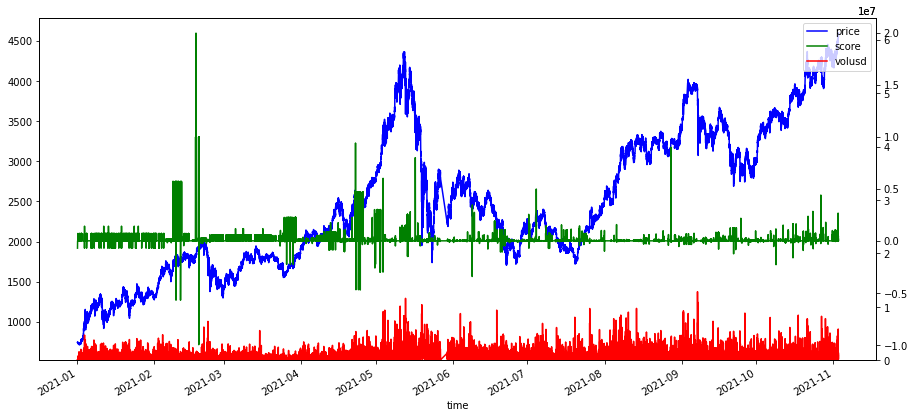

In [43]:
plot_joined_df(onemin)

In [45]:
onemin["shiftedprice"] = onemin.price.shift(1)
onemin = onemin[onemin.score != 0]
onemin["pchange"] = 100 * (np.abs(onemin.price - onemin.shiftedprice)) / ((onemin.price + onemin.shiftedprice)/2)
onemin = onemin.dropna()

/var/folders/3n/qb9qrmdn45q_rjlp5x6g7k5c0000gn/T/ipykernel_14673/1646313184.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  onemin["shiftedprice"] = onemin.price.shift(1)


In [ ]:
onemin

In [ ]:
for i in range(10):
    print(i, " : ", onemin.score.corr(onemin.pchange.shift(i)))

## This is a workflow to get all things ready for forecasting with tweets